In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import os

from gatspy import datasets, periodic

%matplotlib notebook
import matplotlib.pyplot as plt

import cesium
from cesium.time_series import TimeSeries
from cesium.featurize import featurize_single_ts, featurize_time_series

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
with open('KIC_6763132_PTF_R_4505_05_noshift.dat','r') as f:
    next(f) # skip first row
    df = pd.DataFrame(l.rstrip().split() for l in f)

print(len(df))

54


In [3]:
t  = df[0].astype('float64').values 
t0 = t - t[0]
mag = df[1].astype('float64').values
dmag = df[2].astype('float64').values

In [4]:
def func(x,m0,A1,A2,A3,A4,A5,A6,phi1,phi2,phi3,phi4,phi5,phi6):
    P = 0.5877887
    return m0+ A1*np.sin(2*np.pi*x/P + phi1) \
             + A2*np.sin(4.*np.pi*x/P + phi2) \
             + A3*np.sin(6.*np.pi*x/P + phi3) \
             + A4*np.sin(8.*np.pi*x/P + phi4) \
             + A5*np.sin(10.*np.pi*x/P + phi5) + A6*np.sin(12.*np.pi*x/P + phi6) 

In [5]:
popt, pcov = curve_fit(func, t0, mag)
print(popt)

[13.33775594 -0.24653029  0.1187528   0.08803022  0.06160114 -0.03307477
 -0.02091117  1.57733958 11.89880534  0.51505974  1.80302297 -0.04521184
  1.6383884 ]


In [6]:
m = 6
print('phi3: {}, phi1: {}'.format(popt[m+3], popt[m+1]))
print('phi31: {}'.format(popt[m+3] - 3*popt[m+1]))

phi3: 0.5150597375878729, phi1: 1.577339584099565
phi31: -4.216959014710822


In [7]:
# Chow-Choong Parameters:

A0= 13.337
A_1= 0.246; P_1= 4.116   
A_2= 0.118; P_2= 4.407  
A_3= 0.087; P_3= 4.989   
A_4= 0.061; P_4= 5.689   
A_5= 0.032; P_5= 0.113 
A_6= 0.021; P_6= 1.270  

P = 0.5877887

mm = A0 + A_1*np.sin(2*np.pi*t0/P + P_1) \
             + A_2*np.sin(4.*np.pi*t0/P + P_2) \
             + A_3*np.sin(6.*np.pi*t0/P + P_3) \
             + A_4*np.sin(8.*np.pi*t0/P + P_4) \
             + A_5*np.sin(10.*np.pi*t0/P + P_5) + A_6*np.sin(12.*np.pi*t0/P + P_6) 

<IPython.core.display.Javascript object>


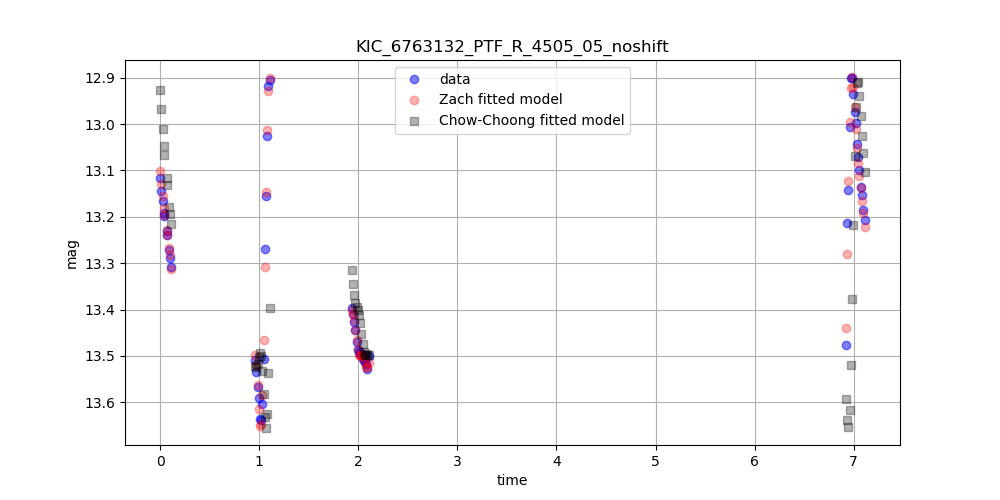

In [8]:
plt.figure(1,(10,5))
plt.plot(t0, mag, 'bo', alpha=0.5,label='data')
plt.plot(t0, func(t0, *popt), 'ro', alpha = 0.3, label='Zach fitted model')
plt.plot(t0, mm, 'ks', alpha = 0.3, label='Chow-Choong fitted model')
plt.title('KIC_6763132_PTF_R_4505_05_noshift')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend()
plt.gca().invert_yaxis()
plt.grid()

<IPython.core.display.Javascript object>


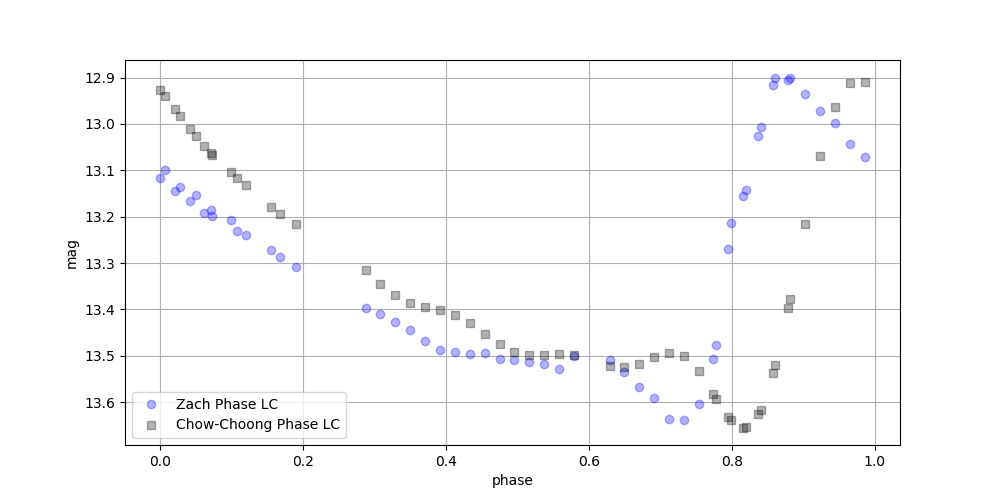

In [9]:
#period = 0.5877887
phase = (t0 / P) % 1

plt.figure(2,(10,5))

plt.plot(phase, mag, 'bo',alpha=0.3, label='Zach Phase LC')
plt.plot(phase, mm, 'ks',alpha=0.3, label='Chow-Choong Phase LC')
plt.xlabel('phase')
plt.ylabel('mag')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()